In [1]:
#Setting up the system

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
#basic libraries

In [4]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [5]:
os.getcwd()

'G:\\My Drive\\CST461 Audit'

In [6]:
os.chdir('''MyWorkingDirectory''')

In [7]:
base_dir = os.getcwd()

train_dir = 'HW5train'
val_dir = 'HW5val'
test_dir = 'HW5test'

train_cats_dir = os.path.join(base_dir, train_dir, 'cat')
train_dogs_dir = os.path.join(base_dir, train_dir, 'dog')
train_elephants_dir = os.path.join(base_dir, train_dir, 'elephant')

val_cats_dir = os.path.join(base_dir, val_dir, 'cat')
val_dogs_dir = os.path.join(base_dir, val_dir, 'dog')
val_elephants_dir = os.path.join(base_dir, val_dir, 'elephant')

test_cats_dir = os.path.join(base_dir, test_dir, 'cat')
test_dogs_dir = os.path.join(base_dir, test_dir, 'dog')
test_elephants_dir = os.path.join(base_dir, test_dir, 'elephant')

In [8]:
b_s = 10#fp #batch_size
s_p_e = 9#sp #steps per epoch
n_e = 20#tp #number of epochs
#experience says that having a very large number of epochs is a bad idea

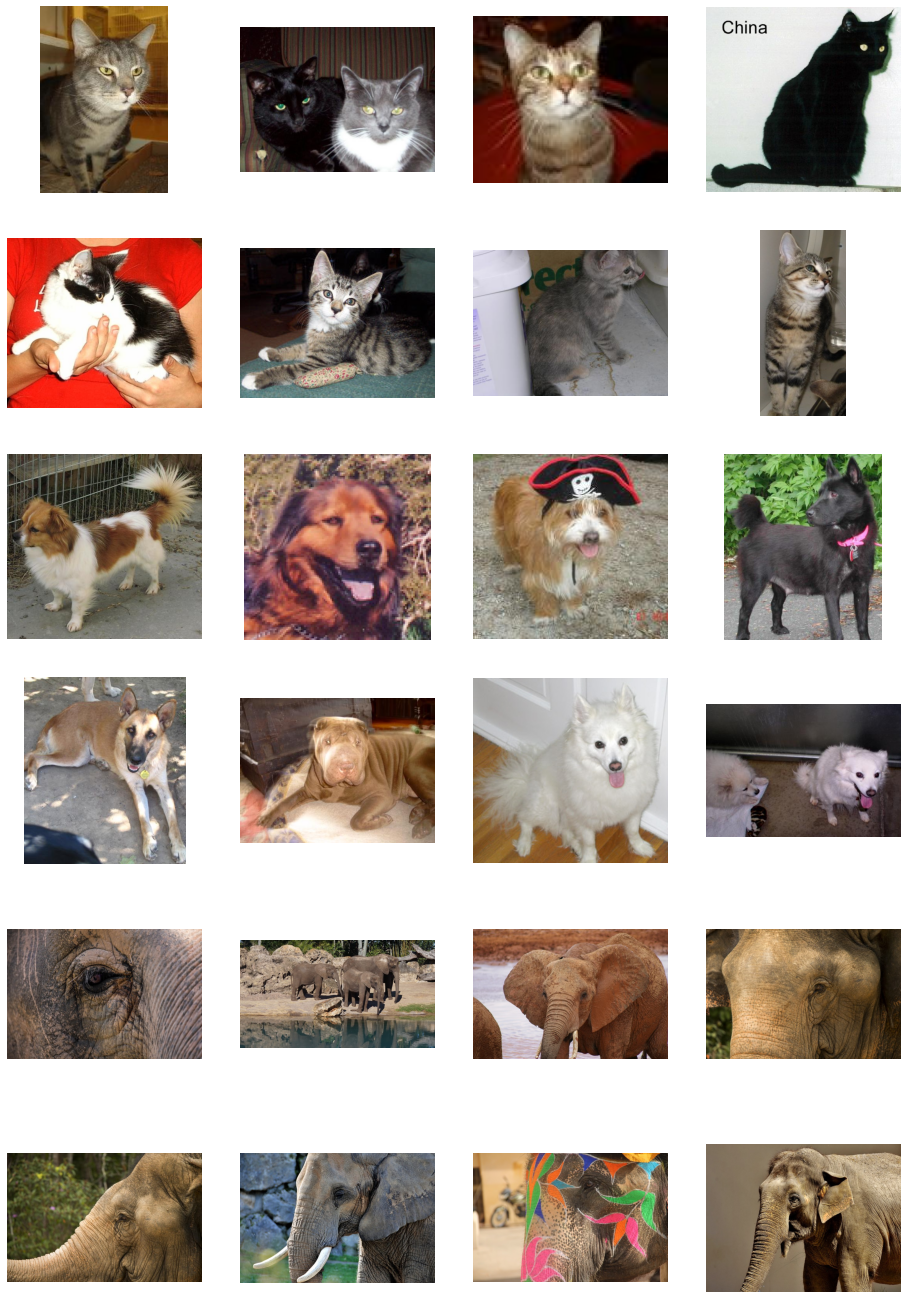

In [9]:
#Check whether images have been loaded correctly
import matplotlib.image as mpimg
nrows = 6
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100

#get the names of the individual files
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
train_elephant_fnames = os.listdir( train_elephants_dir )

#grab eight pictures from each file
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

next_elephant_pix = [os.path.join(train_elephants_dir, fname) 
                for fname in train_elephant_fnames[ pic_index-8:pic_index]
               ]

#put them is a grid to look at.
for i, img_path in enumerate(next_cat_pix+next_dog_pix+next_elephant_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [10]:
train_datagen = ImageDataGenerator(rescale = 1.0/255. )
val_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [11]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = b_s, class_mode = 'categorical', target_size = (150, 150))
validation_generator = test_datagen.flow_from_directory(val_dir, batch_size = b_s, class_mode = 'categorical', target_size = (150, 150))

Found 1800 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [12]:
#Load the base model
#i.e. download it from https://storage.googleapis.com/tesorflow/keras-applications/inception_v3/inception_v3_weights_tf_dim_ordering_tf_kerels_notop.h5
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras import models
from keras import layers
model = models.Sequential()
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')
model.add(base_model)

Using TensorFlow backend.


In [13]:
#Make sure that we don't train the weights.
for layer in base_model.layers:
    layer.trainable = False

In [14]:
#Create the model to go on top of the base model
from tensorflow.keras.optimizers import Adamax
import keras

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(3, activation='softmax'))

lr = 4 

opt = Adamax(learning_rate=10**-lr)
model.compile(optimizer=opt
              ,loss='categorical_crossentropy'
              ,metrics=['accuracy'])

learning rate:  0.0001


In [15]:
#Let's see a summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               9437696   
_________________________________________________________________
batch_normalization_94 (Batc (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 31,244,067
Trainable params: 9,440,259
Non-trainable params: 21,803,808
_________________________________________________________________
None


In [16]:
#fit the model
import time
start = time.time()

history = model.fit(
    train_generator
    , validation_data = validation_generator
    , steps_per_epoch = s_p_e
    , epochs = n_e)

end = time.time()
print('Number of seconds: ',end - start)

Epoch 1/20
9/9 [==============================] - 15s 2s/step - loss: 0.4705 - accuracy: 0.8000 - val_loss: 0.2740 - val_accuracy: 0.9200
Epoch 2/20
9/9 [==============================] - 14s 2s/step - loss: 0.4228 - accuracy: 0.8778 - val_loss: 0.2285 - val_accuracy: 0.9333
Epoch 3/20
9/9 [==============================] - 13s 1s/step - loss: 0.1243 - accuracy: 0.9556 - val_loss: 0.1813 - val_accuracy: 0.9467
Epoch 4/20
9/9 [==============================] - 14s 2s/step - loss: 0.2189 - accuracy: 0.9222 - val_loss: 0.1875 - val_accuracy: 0.9483
Epoch 5/20
9/9 [==============================] - 13s 1s/step - loss: 0.1870 - accuracy: 0.9556 - val_loss: 0.1837 - val_accuracy: 0.9483
Epoch 6/20
9/9 [==============================] - 14s 2s/step - loss: 0.2752 - accuracy: 0.9333 - val_loss: 0.1712 - val_accuracy: 0.9517
Epoch 7/20
9/9 [==============================] - 14s 2s/step - loss: 0.3507 - accuracy: 0.9222 - val_loss: 0.1398 - val_accuracy: 0.9567
Epoch 8/20
9/9 [==================

In [17]:
#With default parameters from the example
    #batch size = 20, steps per epoch = 10, epochs = 9
    #ends up with training accuracy of .2950 and validation accuracy of .3333
#with dropout = .5
    #ends up with training accuracy = .325 and val accuracy of .3333
#what if batch size = 20, steps per epoch = 15, and epochs = 6 (dropout stays)
    #Doesn't make things much better
    #train acc = .3333 and val_acc = .3333
#Changing to categorical rather than binary helped immensely.
    #Dense 1024, dropout .5
    #training accuracy is at 84% and validation accuracy is at 96.67%
#Dense 512, dropout .7
    #train accuracy at 86.675 and validation acc at 96%
#so chances are that by messing with the size of the single dense layer and chance of dropout I won't improve things much.
#what about adding a second dense layer?
'''
Another try
batch_size =  120
steps per epoch =  3
number of epochs =  5
size of first FC =  32
size of second FC =  32
dropout rate =  0.5
loss: 0.8827 - acc: 0.6222 - val_loss: 0.4199 - val_acc: 0.8500

Another try
batch_size =  300
steps per epoch =  2
number of epochs =  3
size of first FC =  256
size of second FC =  256
dropout rate =  0.5
loss: 1.2399 - acc: 0.6333 - val_loss: 0.2148 - val_acc: 0.9317

Another try
batch_size =  30
steps per epoch =  10
number of epochs =  6
size of first FC =  1024
size of second FC =  1024
dropout rate =  0.6575555038526472
loss: 0.5436 - acc: 0.8433 - val_loss: 0.2145 - val_acc: 0.9400
#Good validation performance, but the difference between that and the training accuracy indicates still underfitting.

#amd again
batch_size =  20
steps per epoch =  15
number of epochs =  6
size of first FC =  512
size of second FC =  256
dropout rate =  0.4735345361789385
loss: 0.6307 - acc: 0.8767 - val_loss: 0.3819 - val_acc: 0.8850
#I'm not doing much better by playing around with these hyperparameter values than I was when I started.
#What can I do about the network architecture?

#Redone with newer commands model.add
batch_size =  50
steps per epoch =  9
number of epochs =  4
size of first FC =  1024
size of second FC =  512
dropout rate =  0.5600628407341621
loss: 0.9624 - accuracy: 0.8667 - val_loss: 0.5975 - val_accuracy: 0.9
#Well, it hasn't changed much. Hopefully I haven't broken the network architecture by trying to update to a newer version.

#Tried adding in individual dropout layers for each of the dense layers
batch_size =  12
steps per epoch =  15
number of epochs =  10
size of first FC =  512
size of second FC =  256
dropout rate 1 =  0.27444933130266813
dropout rate 2 =  0.2712544297750185
loss: 2.1954 - accuracy: 0.8500 - val_loss: 0.4579 - val_accuracy: 0.9533
#still underfitting, but looks better

#substituted in global average pooling 2d instead of the flattening.
batch_size =  20
steps per epoch =  15
number of epochs =  6
size of first FC =  512
size of second FC =  256
dropout rate 1 =  0.2782849438219452
dropout rate 2 =  0.5281050979518107
loss: 1.0429 - accuracy: 0.7944 - val_loss: 0.0879 - val_accuracy: 0.9700
#still doesn't look very good.

#Forcing the dense layers to 1024 neurons
batch_size =  20
steps per epoch =  15
number of epochs =  6
size of first FC =  1024
size of second FC =  1024
dropout rate 1 =  0.6058627669952956
dropout rate 2 =  0.4156501041875779
loss: 1.6178 - accuracy: 0.7944 - val_loss: 0.1877 - val_accuracy: 0.9367
#Not really any better

#Again?
batch_size =  50
steps per epoch =  4
number of epochs =  9
size of first FC =  1024
size of second FC =  1024
dropout rate 1 =  0.31087256489264714
dropout rate 2 =  0.3962949001394257
loss: 0.2995 - accuracy: 0.9100 - val_loss: 0.1792 - val_accuracy: 0.9417
#That looks decent. Epoch 8 is weird, but loss seems to be tracking together.
    #val and train accuracy are much closer to tracking with each other, but train accuracy still has times when it's wild.

#20 epochs, 9 steps, batch = 10, dropout = .5
loss: 0.5179 - accuracy: 0.8889 - val_loss: 0.1075 - val_accuracy: 0.9667

#30 epochs, step size 6, batch 10, dropout .5
loss: 0.7144 - accuracy: 0.8500 - val_loss: 0.0933 - val_accuracy: 0.9733
#Still erratic

#epochs = 100, step = 6, batch size = 3
loss: 1.0565 - accuracy: 0.7222 - val_loss: 0.1995 - val_accuracy: 0.9633
Loss and accuracy are STILL chaotic

#maybe learning rate decay...
#epochs = 50, step = 1, batch size = 36
#starts out looking terrible
loss: 3.5158 - accuracy: 0.7500 - val_loss: 1.0002 - val_accuracy: 0.9517
#doesn't end up very good
#still really erratic. Appears to have similar accuract in epochs 0-10, going up until around 18 or 20 and then 
    chaotic until the end - varying around .85
    
Resetting
batch size = 30, steps = 3, epochs = 20
Flatten layer instead of global average pooling 2D
1 Dense Layer of 1024 neurons instead of two of 4096 each
removed the learning rate decay
Learning rate set to a static .0001
loss: 0.6930 - accuracy: 0.8667 - val_loss: 0.1940 - val_accuracy: 0.9533
#by the graphs that one more or less levels off after 3 epochs
#still underfitting, but not very badly

batch size = 30, steps = 3, epochs = 20
Global Average Pooling 2D instead of flatten
learning rate at .00001
loss: 0.9880 - accuracy: 0.6333 - val_loss: 0.2921 - val_accuracy: 0.8983
Loss and accuracy are a lot less erratic
but validation accuracy is still consistently higher than training accuracy

#Dropped everything additional except the gloabl averagepooling2d and the 3-class softmax
#just to see what it would do.
batch size = 4, steps = 15, epochs = 30
That's awful. I cur it off at 15 epochs when train accuracy was just a bit over a quarter and val accuracy was 1/3

#switched out he global average pooling 2d for the original flatten layer.
batch size = 12, steps = 10, epochs = 15
loss: 0.9241 - accuracy: 0.7250 - val_loss: 0.5005 - val_accuracy: 0.8400
#that looks a bit better.
loss tracks fairly well
but validation accuracy increases faster than training accuracy. There's still underfitting.

Switch out rmsprop to default settings.
batch size = 9, steps = 10, epochs = 20
loss: 3.4121 - accuracy: 0.8889 - val_loss: 1.3542 - val_accuracy: 0.9050
Loss and accuracy track a whole lot better with this setup than they have since the beginning
but I'm still only at 88.895 training accuracy and 90.5% validation accuracy.
How can I improve?
I suspect that the dropout was actually making things worse because the reducing overfitting
    may end up pushing for more underfitting.
perhaps cuting it off at 13 epochs would work here?
perhaps need code for pre-activation normalization?

Train only scales (nothing else), one 512 neuron dense layer, batch normalization before and after dense.
flatten layer. Adam optimizer. LR = 1e-5
batch size = 9, steps = 10, epochs = 20
loss: 0.8649 - accuracy: 0.6111 - val_loss: 1.0118 - val_accuracy: 0.6500
time = 291.27044916152954s
train/val Loss and accuracy trend in the same direction, more or less, but they aren't really together.

Implementing multiple dense layers - 512, 128, 64, 32, 16, 8, 4. BatchNormalization before and after each.
    Adamax optimizer
    batch size = 10, steps = 9, epochs = 20, LR = 1e-4
    loss: 0.7387 - accuracy: 0.7222 - val_loss: 0.7334 - val_accuracy: 0.7267
    Number of seconds:  332.20391035079956
    Those plots actually look pretty good. While The accuracy (.7222 and .7267) isn't great, it is the case that the losses
        and accuracies do track pretty well. So at least underfitting isn't really a problem here
    Rising and dropping accuracies and loss in the middle might mean that my learning rate is too large.
        perhaps I should try pushing it to 1e-6

Same parameters excepting that LR = 1e-6
    Accuracy is terrible. Around 1/3.
    loss: 1.4331 - accuracy: 0.3222 - val_loss: 1.1633 - val_accuracy: 0.3917
Number of seconds:  295.3890483379364
    Terribly chaotic
    
Back to 1 dense layer of 512. BatchNormalization only after.
    Adamax optimizer. LR = 1e-4
    Best performance at 9, 12, 14, 20 epochs
    loss: 0.0748 - accuracy: 0.9889 - val_loss: 0.1036 - val_accuracy: 0.9617
    Number of seconds:  292.70778489112854
    Let's call it done here.
    I wonder if I'm just lucky right here. What could I get with more data?
    And why is it that these parameters are the ones that work best?
'''

"\nAnother try\nbatch_size =  120\nsteps per epoch =  3\nnumber of epochs =  5\nsize of first FC =  32\nsize of second FC =  32\ndropout rate =  0.5\nloss: 0.8827 - acc: 0.6222 - val_loss: 0.4199 - val_acc: 0.8500\n\nAnother try\nbatch_size =  300\nsteps per epoch =  2\nnumber of epochs =  3\nsize of first FC =  256\nsize of second FC =  256\ndropout rate =  0.5\nloss: 1.2399 - acc: 0.6333 - val_loss: 0.2148 - val_acc: 0.9317\n\nAnother try\nbatch_size =  30\nsteps per epoch =  10\nnumber of epochs =  6\nsize of first FC =  1024\nsize of second FC =  1024\ndropout rate =  0.6575555038526472\nloss: 0.5436 - acc: 0.8433 - val_loss: 0.2145 - val_acc: 0.9400\n#Good validation performance, but the difference between that and the training accuracy indicates still underfitting.\n\n#amd again\nbatch_size =  20\nsteps per epoch =  15\nnumber of epochs =  6\nsize of first FC =  512\nsize of second FC =  256\ndropout rate =  0.4735345361789385\nloss: 0.6307 - acc: 0.8767 - val_loss: 0.3819 - val_

<ipython-input-25-755fa8700f3f>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticks([0,2,4,6,8,10,12,14,16,18,20])


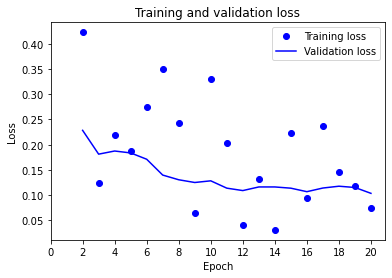

<Figure size 432x288 with 0 Axes>

In [25]:
#plotting loss and accuracy
history_dict = history.history
#print(history_dict.keys())
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
import matplotlib.pyplot as plt
plt.plot(epochs[1:len(epochs)], loss[1:len(loss)], 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs[1:len(epochs)], val_loss[1:len(val_loss)], 'b', label='Validation loss')
plt.axes().set_xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

<ipython-input-26-6c051d3c830b>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticks([0,2,4,6,8,10,12,14,16,18,20])


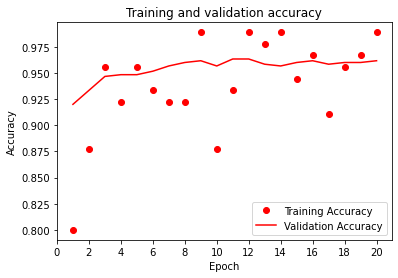

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(epochs, acc, 'ro', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.axes().set_xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.clf()

<ipython-input-27-80142d76e384>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticks([0,2,4,6,8,10,12,14,16,18,20])


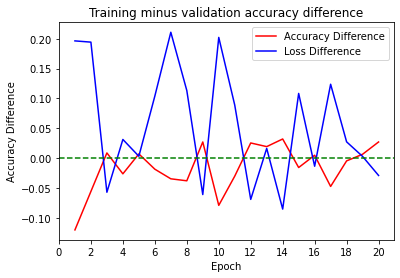

<Figure size 432x288 with 0 Axes>

In [27]:
import operator
diff = list(map(operator.sub, acc, val_acc))
diff2 = list(map(operator.sub, loss, val_loss))
plt.plot(epochs, diff, 'r', label = 'Accuracy Difference')
plt.plot(epochs, diff2, 'b', label = 'Loss Difference')
plt.axhline(y = 0, color = 'g', linestyle = '--') 
plt.axes().set_xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.title('Training minus validation accuracy difference')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Difference')
plt.legend()
plt.show()
plt.clf()